In [18]:
import dask.dataframe as dd
import time
from matplotlib import pyplot as plt
import numpy as np
from collections import Counter
import pandas as pd

In [29]:
cols = ['fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count']
df = dd.read_csv('train.csv').head(n=10000000, npartitions = 20)
df =  df.sample(frac = 0.5,replace=True)
#df.to_csv('updatedCsv.csv')

In [20]:
#data = pd.read_csv('updatedCsv.csv')
#print(len(data))

In [30]:
df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [31]:
df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [32]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.000000e+06,5.000000e+06,5.000000e+06,4.999971e+06,4.999971e+06,5.000000e+06
mean,1.133802e+01,-7.250208e+01,3.991699e+01,-7.250664e+01,3.992139e+01,1.684343e+00
std,9.804755e+00,1.297945e+01,8.748498e+00,1.302750e+01,9.816719e+00,1.321847e+00
min,-6.000000e+01,-3.426609e+03,-3.457347e+03,-3.412653e+03,-3.461541e+03,0.000000e+00
25%,6.000000e+00,-7.399206e+01,4.073491e+01,-7.399138e+01,4.073405e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075264e+01,-7.398014e+01,4.075315e+01,1.000000e+00
75%,1.250000e+01,-7.396709e+01,4.076713e+01,-7.396364e+01,4.076810e+01,2.000000e+00
max,9.520000e+02,3.442185e+03,3.306748e+03,3.457622e+03,3.351403e+03,2.080000e+02


In [33]:
print(df.shape)

(5000000, 8)


In [34]:
df['passenger_count'][df.passenger_count==0].count()

17671

In [35]:
print(df.shape)
df = df.drop(df[df['passenger_count']==0].index, axis = 0)
print(df.shape)

(5000000, 8)
(4878871, 8)


In [36]:
df['passenger_count'][df.passenger_count>6].count()

8

In [37]:
print(df.shape)
df = df.drop(df[df['passenger_count']>6].index, axis = 0)
print(df.shape)

(4878871, 8)
(4878821, 8)


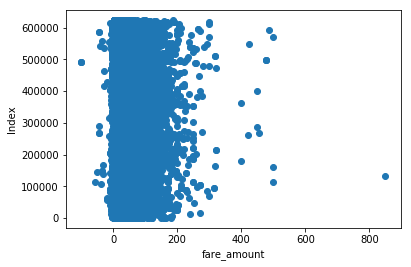

In [49]:
plt.scatter(x=df.fare_amount,y=df.index)
plt.ylabel('Index')
plt.xlabel('fare_amount')
plt.show()

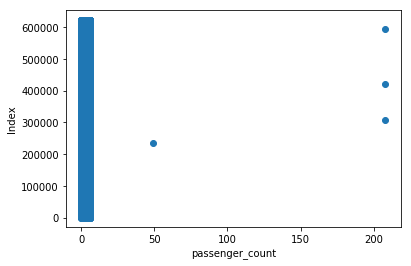

In [53]:
plt.scatter(x=df.passenger_count,y=df.index)
plt.ylabel('Index')
plt.xlabel('passenger_count')
plt.show()

In [38]:
df.isnull().sum().sort_values(ascending=False)

passenger_count      0
dropoff_latitude     0
dropoff_longitude    0
pickup_latitude      0
pickup_longitude     0
pickup_datetime      0
fare_amount          0
key                  0
dtype: int64